In [10]:
import matplotlib.pyplot as plt

def plot_results_comparison(dataset, categories, AAHL_values, ShaSpec_values):
    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.35
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(AAHL_values))
    r2 = [x + bar_width + bar_space for x in r1]

    # Make the plot
    ax.bar(r1, AAHL_values, color='orange', width=bar_width, label='AAHL', zorder=3)
    ax.bar(r2, ShaSpec_values, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate')
    ax.set_ylabel('Accuracy')
    ax.set_xticks([r + bar_width + bar_space for r in range(len(AAHL_values))])
    ax.set_xticklabels(categories)
    
    # Adjust the y-axis to start at 75 and end a little above the highest value
    ax.set_ylim(bottom=75, top=max(AAHL_values + ShaSpec_values) + 2)

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend inside the plot area but above the bars and grid lines
    # Adjust the bbox_to_anchor values to suit your plot's specific dimensions
    ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1), frameon=False)

    plt.show()

    # Export to pdf
    fig.savefig(f'results_comparison_{dataset}.pdf', bbox_inches='tight')

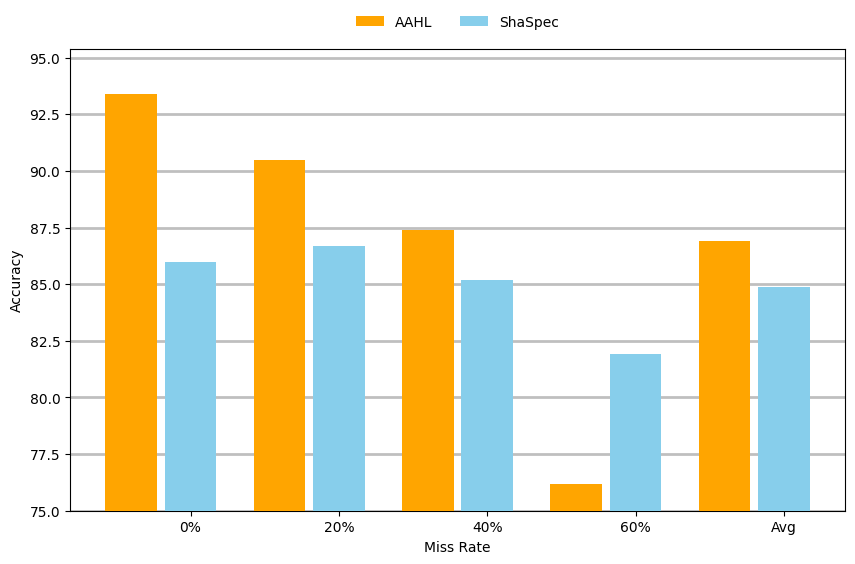

In [11]:
# DSADS results
dataset = "DSADS"
categories = ['0%', '20%', '40%', '60%', 'Avg']
AAHL_values = [93.4, 90.5, 87.4, 76.2, 86.9]
ShaSpec_values = [86, 86.7, 85.2, 81.9, 84.9]

plot_results_comparison(dataset, categories, AAHL_values, ShaSpec_values)

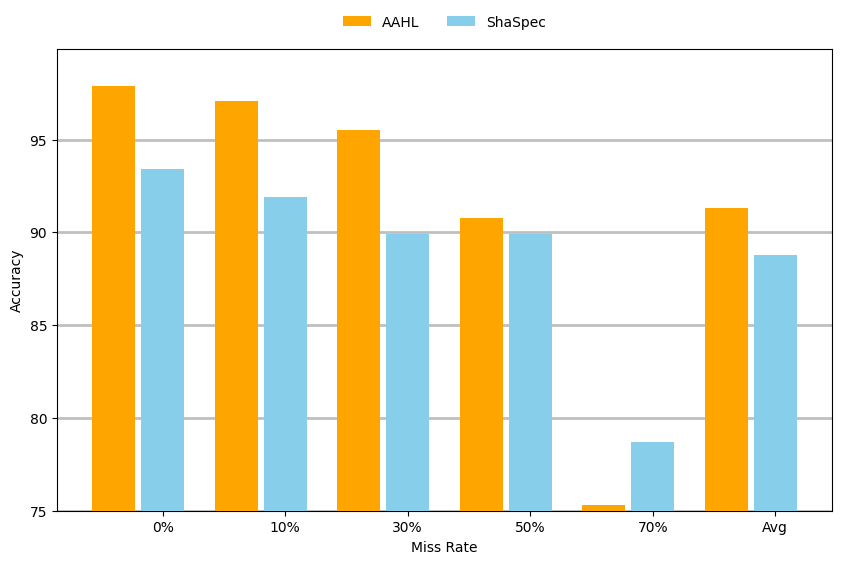

In [12]:
# REALDISP results
dataset = "REALDISP"
categories = ['0%', '10%', '30%', '50%', '70%', 'Avg']
AAHL_values = [97.9, 97.1, 95.5, 90.8, 75.3, 91.3]
ShaSpec_values = [93.4, 91.9, 89.9, 89.9, 78.7, 88.8]

plot_results_comparison(dataset, categories, AAHL_values, ShaSpec_values)

In [13]:
def plot_relative_drop_comparison(dataset, categories, AAHL_values, ShaSpec_values):
    # Calculating the highest score to establish a baseline
    baseline = max(AAHL_values + ShaSpec_values)

    # Calculating the relative drop for each
    AAHL_relative_drop = [(baseline - value) / baseline * 100 for value in AAHL_values]
    ShaSpec_relative_drop = [(baseline - value) / baseline * 100 for value in ShaSpec_values]

    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.35
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(AAHL_relative_drop))
    r2 = [x + bar_width + bar_space for x in r1]

    # Make the plot
    ax.bar(r1, AAHL_relative_drop, color='orange', width=bar_width, label='AAHL', zorder=3)
    ax.bar(r2, ShaSpec_relative_drop, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate')
    ax.set_ylabel('Relative Drop (%)')
    ax.set_xticks([r + bar_width / 2 for r in range(len(AAHL_relative_drop))])
    ax.set_xticklabels(categories)

    # Adjust the y-axis to start at 0 and end a little above the highest value
    ax.set_ylim(bottom=0, top=max(AAHL_relative_drop + ShaSpec_relative_drop) + 5)

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend
    ax.legend(loc='upper right', frameon=False)

    plt.title(f'Relative Drop in Scores for {dataset}')
    plt.show()

    # Export to pdf
    # fig.savefig(f'relative_drop_comparison_{dataset}.pdf', bbox_inches='tight')


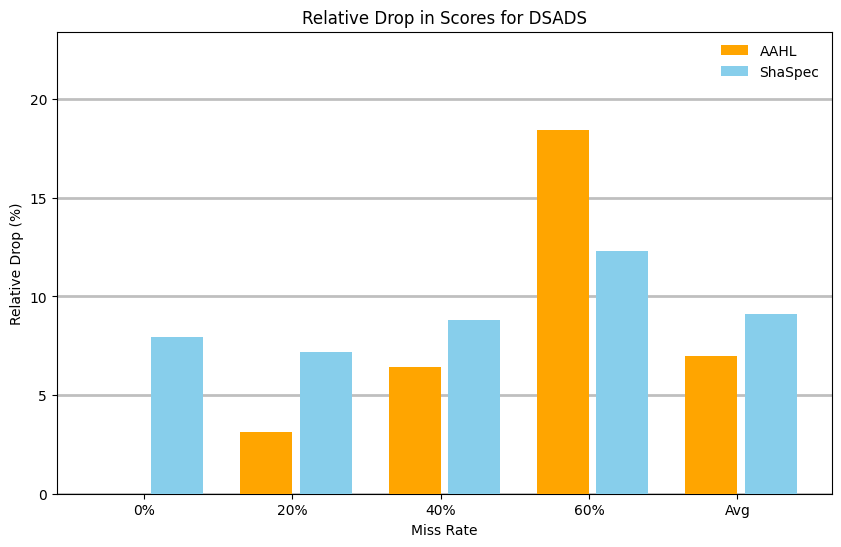

In [14]:
# DSADS results
dataset = "DSADS"
categories = ['0%', '20%', '40%', '60%', 'Avg']
AAHL_values = [93.4, 90.5, 87.4, 76.2, 86.9]
ShaSpec_values = [86, 86.7, 85.2, 81.9, 84.9]

plot_relative_drop_comparison(dataset, categories, AAHL_values, ShaSpec_values)

In [15]:
import matplotlib.pyplot as plt

def plot_robustness_index_comparison(dataset, categories, AAHL_values, ShaSpec_values):
    # Assuming the first value in each list is the baseline performance at 0% miss rate
    AAHL_baseline = AAHL_values[0]
    ShaSpec_baseline = ShaSpec_values[0]

    # Calculating the Robustness Index for each condition
    # The Robustness Index is calculated as the current value divided by the baseline value,
    # representing how well each model maintains its baseline performance.
    AAHL_robustness = [(value / AAHL_baseline) * 100 for value in AAHL_values]
    ShaSpec_robustness = [(value / ShaSpec_baseline) * 100 for value in ShaSpec_values]

    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.35
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(AAHL_robustness))
    r2 = [x + bar_width + bar_space for x in r1]

    # Make the plot
    ax.bar(r1, AAHL_robustness, color='orange', width=bar_width, label='AAHL', zorder=3)
    ax.bar(r2, ShaSpec_robustness, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate')
    ax.set_ylabel('Robustness Index (%)')
    ax.set_xticks([r + bar_width / 2 for r in range(len(AAHL_robustness))])
    ax.set_xticklabels(categories)

    # Adjust the y-axis to emphasize the comparison
    ax.set_ylim(bottom=75, top=105)  # Adjust as needed to best visualize your data

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend inside the plot area but above the bars and grid lines
    # Adjust the bbox_to_anchor values to suit your plot's specific dimensions
    ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1), frameon=False)

    # plt.title(f'Robustness Index Comparison for {dataset}')
    plt.show()

    # Export to pdf
    fig.savefig(f'robustness_index_comparison_{dataset}.pdf', bbox_inches='tight')


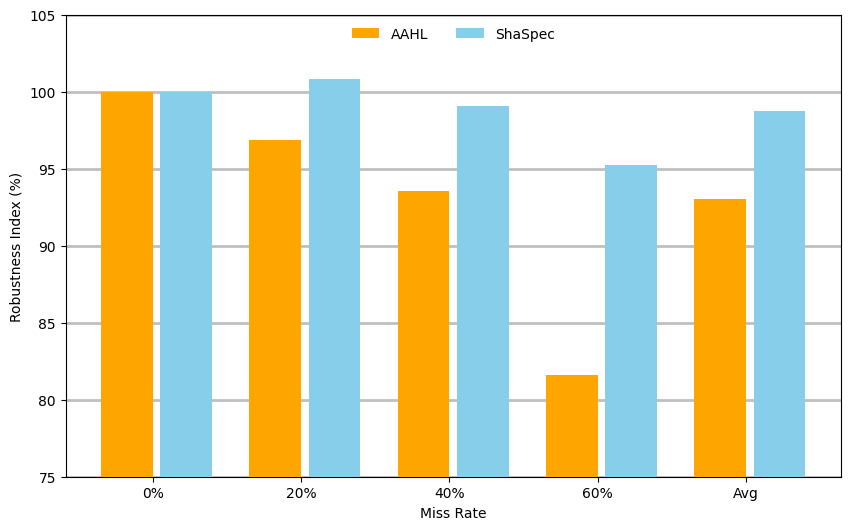

In [16]:
# DSADS results
dataset = "DSADS"
categories = ['0%', '20%', '40%', '60%', 'Avg']
AAHL_values = [93.4, 90.5, 87.4, 76.2, 86.9]
ShaSpec_values = [86, 86.7, 85.2, 81.9, 84.9]

plot_robustness_index_comparison(dataset, categories, AAHL_values, ShaSpec_values)

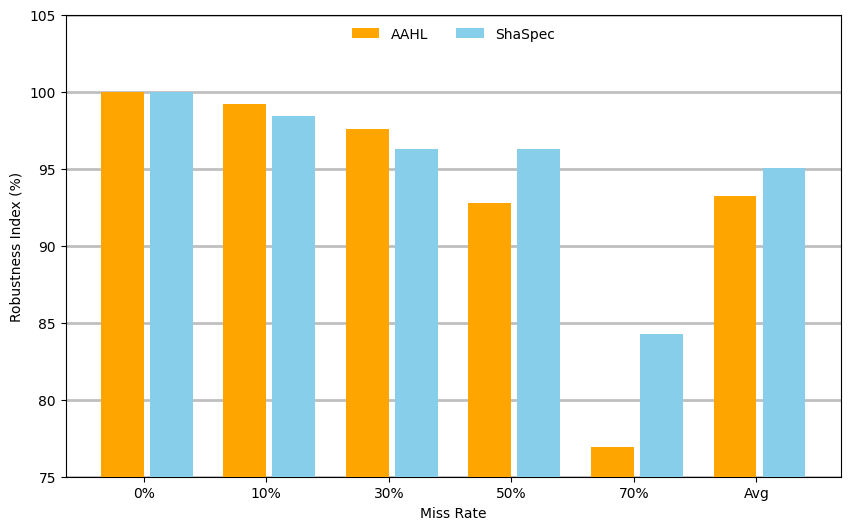

In [17]:
# REALDISP results
dataset = "REALDISP"
categories = ['0%', '10%', '30%', '50%', '70%', 'Avg']
AAHL_values = [97.9, 97.1, 95.5, 90.8, 75.3, 91.3]
ShaSpec_values = [93.4, 91.9, 89.9, 89.9, 78.7, 88.8]

plot_robustness_index_comparison(dataset, categories, AAHL_values, ShaSpec_values)